# <center> **KPMG VIRTUAL INTERNSHIP PROJECT** </center>
# <center> **Task 1 - Data Quality Assessment** </center>
# <center> **Assessment of data quality and completeness in preparation for analysis** </center> 

## Introduction :

**Sprocket Central Pty Ltd** , a medium size bikes & cycling accessories organisation, has approached Tony Smith (Partner) in KPMG’s Lighthouse & Innovation Team. Sprocket Central Pty Ltd  is keen to learn more about KPMG’s expertise in its Analytics, Information & Modelling team. 

Smith discusses KPMG’s expertise in this space. In particular, he speaks about how the team can effectively analyse the datasets to help Sprocket Central Pty Ltd grow its business.

Primarily, Sprocket Central Pty Ltd needs help with its customer and transactions data. The organisation has a large dataset relating to its customers, but their team is unsure how to effectively analyse it to help optimise its marketing strategy.

However, in order to support the analysis, you speak to the Associate Director for some ideas and she advised that “the importance of optimising the quality of customer datasets cannot be underestimated. The better the quality of the dataset, the better chance you will be able to use it drive company growth.”

**The client provided KPMG with 3 datasets:**

1. Customer Demographic
2. Customer Addresses
3. Transactions data in the past 3 months

### Importing the required libraries and Files

In [1]:
import pandas as pd

file_path = r'E:\KPMG\KPMG_VI_New_raw_data_update_final.xlsx'

# Read each sheet with date columns specified
Transactions = pd.read_excel(file_path, sheet_name='Transactions')
NewCustomerList = pd.read_excel(file_path, sheet_name='NewCustomerList',
                               dtype={'DOB': 'datetime64[ns]'})
CustomerDemographic = pd.read_excel(file_path, sheet_name='CustomerDemographic',
                                   dtype={'DOB': 'datetime64[ns]'})
CustomerAddress = pd.read_excel(file_path, sheet_name='CustomerAddress')



# EXPLORING DATASETS :
### TRANSACTIONS TABLE ANALYSIS

In [2]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
Transactions.shape

(20000, 13)

In [5]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [10]:
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

* **We can see that there are some missing values in the columns : 'online_order', 'brand', 'product_line ', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date' we can drop as there are less missing values**

* **We can also notice that the 'product_first_sold_date' column is of float datatype which has to be changed to date format.**

In [6]:
Transactions['product_first_sold_date']=pd.to_datetime(Transactions['product_first_sold_date'], unit='s')

In [7]:
Transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [8]:
Transactions.duplicated().sum()

0

**there are no duplicates values**

In [11]:
Transactions.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [12]:
Transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [13]:
Transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [14]:
Transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [15]:
Transactions['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [16]:
Transactions['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

## CUSTOMER DEMOGRAPHIC TABLE ANALYSIS

In [21]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.10,1.375,1.71875,1.460938,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.59,0.590,0.73750,0.626875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.50,0.500,0.50000,0.500000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.44,0.550,0.55000,0.550000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.43,0.430,0.53750,0.537500,4,4,1.703125


In [22]:
NewCustomerList.shape

(1000, 23)

In [23]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

**We find that the table data has some columns that are not necessaryy and they should be dropped : 'Unnamed: 16','Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'. We also notice that there are some missing values in the table**

In [25]:
NewCustomerList = NewCustomerList.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1)

In [26]:
NewCustomerList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

### Again we have some null values 

In [28]:
NewCustomerList.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Rank                                    324
Value                                   324
dtype: int64

In [29]:
NewCustomerList['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [30]:
NewCustomerList['gender']=NewCustomerList['gender'].replace('U','Unidentified')

In [31]:
NewCustomerList['gender'].value_counts()


Female          513
Male            470
Unidentified     17
Name: gender, dtype: int64

In [32]:
NewCustomerList['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [33]:
NewCustomerList['wealth_segment'].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

In [34]:
NewCustomerList['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

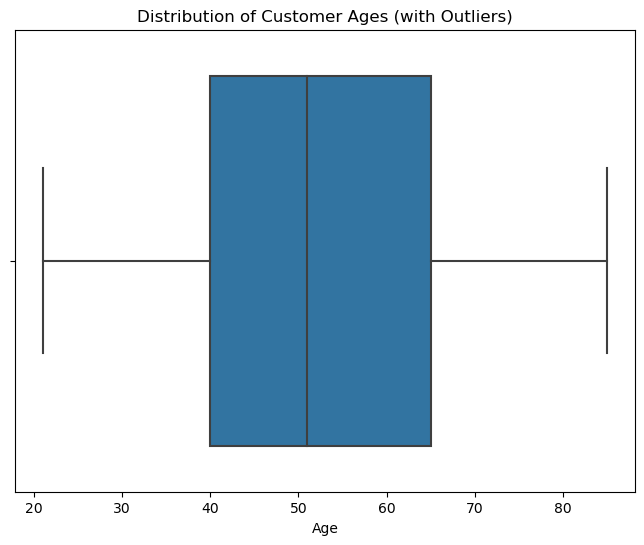

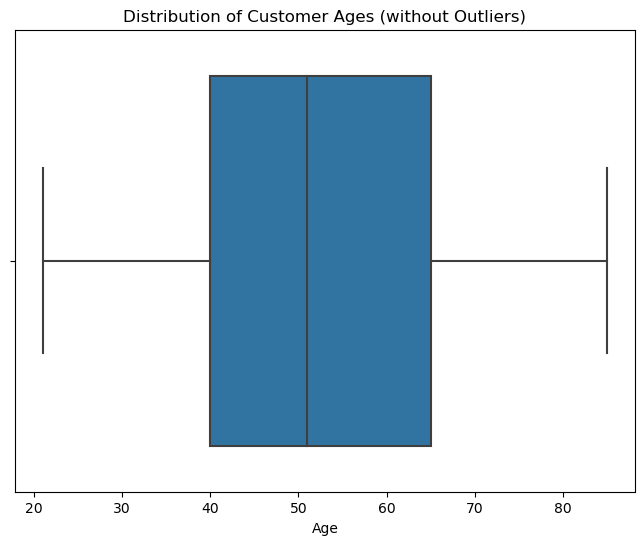

Outliers:
Empty DataFrame
Columns: [first_name, last_name, gender, past_3_years_bike_related_purchases, DOB, job_title, job_industry_category, wealth_segment, deceased_indicator, owns_car, tenure, address, postcode, state, country, property_valuation, Rank, Value, Age]
Index: []


In [35]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the NewCustomerList DataFrame is stored in the 'NewCustomerList' variable

# Convert DOB to datetime
NewCustomerList['DOB'] = pd.to_datetime(NewCustomerList['DOB'])

# Calculate age
current_date = pd.to_datetime('today')
NewCustomerList['Age'] = (current_date - NewCustomerList['DOB']).astype('<m8[Y]')

# Calculate IQR
Q1 = NewCustomerList['Age'].quantile(0.25)
Q3 = NewCustomerList['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
outlier_threshold = 1.5 * IQR

# Filter outliers
outliers = NewCustomerList[(NewCustomerList['Age'] < Q1 - outlier_threshold) |
                           (NewCustomerList['Age'] > Q3 + outlier_threshold)]

# Create a boxplot of ages with outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=NewCustomerList['Age'])
plt.title("Distribution of Customer Ages (with Outliers)")
plt.xlabel("Age")

# Create a boxplot of ages without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=NewCustomerList['Age'], showfliers=False)
plt.title("Distribution of Customer Ages (without Outliers)")
plt.xlabel("Age")

# Show the plots
plt.show()

# Print the outlier rows
print("Outliers:")
print(outliers)


### No outliers for age 

## CUSTOMER DEMOGRAPHIC TABLE ANALYSIS

In [37]:
CustomerDemographic.shape

(4000, 13)

In [38]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [39]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [40]:
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [41]:
CustomerDemographic.duplicated().sum()

0

**We can see that the table consists of some missing values in certain columns : 'last_name', 'DOB', 'job_title', 
'job_industry_category', 'default', 'tenure'. There are no duplicate values. The default column seems to be unusual and should be checked in detail. The 'gender' column also seems to have inconsistent entires in it.** 

In [42]:
CustomerDemographic['default'].value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

In [43]:

CustomerDemographic = CustomerDemographic.drop('default', axis=1)


### Drop the 'default' column

In [44]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [45]:
CustomerDemographic['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

** The 'gender' column has entries for male and female specifies by 4 values : 'Male', 'Female', 'M', 'F' and it also has an entry 'U' which means 'Unidentified'. So we will group these data and make them more consistent and correct.**

In [46]:
CustomerDemographic['gender'] = CustomerDemographic['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unidentified')

In [47]:
CustomerDemographic['gender'].value_counts()

Female          2039
Male            1873
Unidentified      88
Name: gender, dtype: int64

In [48]:
CustomerDemographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
dtype: int64

In [49]:
CustomerDemographic['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [50]:
CustomerDemographic['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [51]:
CustomerDemographic['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [52]:
CustomerDemographic['owns_car'].value_counts()


Yes    2024
No     1976
Name: owns_car, dtype: int64

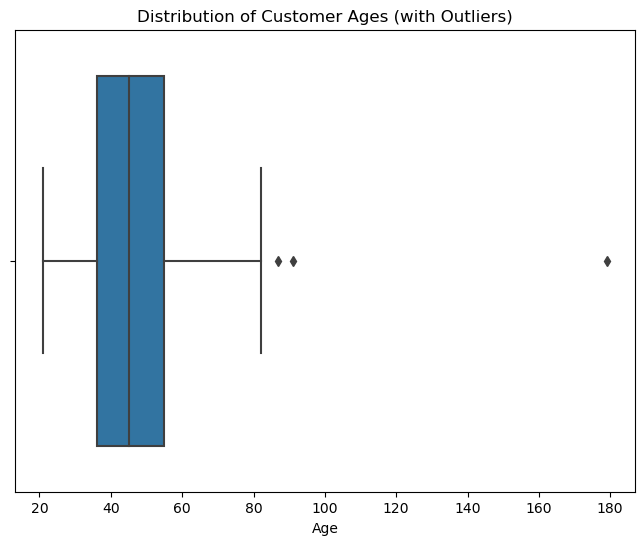

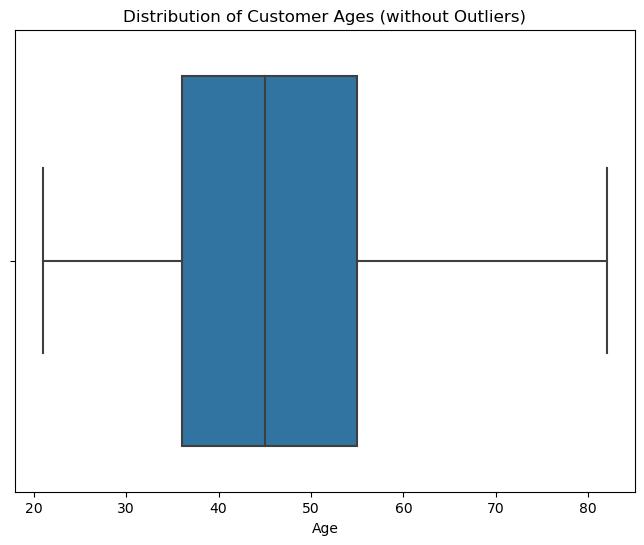

Outliers:
      customer_id first_name last_name        gender  \
33             34   Jephthah  Bachmann  Unidentified   
719           720     Darrel     Canet          Male   
1091         1092     Katlin   Creddon        Female   

      past_3_years_bike_related_purchases        DOB           job_title  \
33                                     59 1843-12-21     Legal Assistant   
719                                    67 1931-10-23  Recruiting Manager   
1091                                   56 1935-08-22  VP Quality Control   

     job_industry_category     wealth_segment deceased_indicator owns_car  \
33                      IT  Affluent Customer                  N       No   
719                 Retail  Affluent Customer                  N       No   
1091                Retail      Mass Customer                  N       No   

      tenure    Age  
33      20.0  179.0  
719      6.0   91.0  
1091     5.0   87.0  


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the CustomerDemographic DataFrame is stored in the 'CustomerDemographic' variable

# Convert DOB to datetime
CustomerDemographic['DOB'] = pd.to_datetime(CustomerDemographic['DOB'])

# Calculate age
current_date = pd.to_datetime('today')
CustomerDemographic['Age'] = (current_date - CustomerDemographic['DOB']).astype('<m8[Y]')

# Calculate IQR
Q1 = CustomerDemographic['Age'].quantile(0.25)
Q3 = CustomerDemographic['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
outlier_threshold = 1.5 * IQR

# Filter outliers
outliers = CustomerDemographic[(CustomerDemographic['Age'] < Q1 - outlier_threshold) |
                               (CustomerDemographic['Age'] > Q3 + outlier_threshold)]

# Create a boxplot of ages with outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=CustomerDemographic['Age'])
plt.title("Distribution of Customer Ages (with Outliers)")
plt.xlabel("Age")

# Create a boxplot of ages without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=CustomerDemographic['Age'], showfliers=False)
plt.title("Distribution of Customer Ages (without Outliers)")
plt.xlabel("Age")

# Show the plots
plt.show()

# Print the outlier rows
print("Outliers:")
print(outliers)


### We have  outliers for age 
***It's important to carefully consider the nature of the outliers, the context of  analysis, and the goals you want to achieve before deciding on the most appropriate approach to handle outliers. Additionally, discussing with domain experts or consulting statistical guidelines can provide valuable insights for making informed decisions.***



## CUSTOMER ADDRESS TABLE ANALYSIS

In [57]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [58]:
CustomerAddress.shape

(3999, 6)

In [59]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [61]:
CustomerAddress.duplicated().sum()

0

In [62]:
CustomerAddress['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [63]:
CustomerAddress['country'].value_counts()

Australia    3999
Name: country, dtype: int64

   **The Customer Address Table is consisent and accurate. It contains no missing data as well as no duplicated data in it. The table seems to contain all the customer address information about customers in Australia**

**We can see that the 3 tables : the 'Customer Demographic' Table , the 'New Customer Lists' Table and the 'Customer Address' Table are relevant to each other, so it would be more meaningful to combine these tables and view them as one, Or we can have additional column CustomerID in NewCustomerLIst**

# CONCLUSION
**The given data is analysed and investigated in all aspects to inspect the Quality of data with respect to all qualities mentioned in the Data Quality Framework Table**

- Accuracy


- Completeness


- Uniqueness


- Validity


- Consistency


- Relevancy


- Timeliness

## Save the Excel file

In [66]:
writer = pd.ExcelWriter('C:/path/to/save/combined_data.xlsx', engine='xlsxwriter')


# Write each dataframe to a separate sheet
Transactions.to_excel(writer, sheet_name='Transactions', index=False)
NewCustomerList.to_excel(writer, sheet_name='NewCustomerList', index=False)
CustomerDemographic.to_excel(writer, sheet_name='CustomerDemographic', index=False)
CustomerAddress.to_excel(writer, sheet_name='CustomerAddress', index=False)


writer.save()